In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive/ML_Projects/olympicsData"

athlete_events.csv  noc_regions.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
athletes = pd.read_csv('/content/drive/My Drive/ML_Projects/olympicsData/athlete_events.csv')
regions = pd.read_csv('/content/drive/My Drive/ML_Projects/olympicsData/noc_regions.csv')

In [5]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
athletes.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [7]:
athletes.duplicated().sum()

1385

In [8]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [9]:
athletes_summer = athletes[athletes['Season'] == 'Summer']

In [10]:
athletes_summer = athletes_summer.merge(regions, on='NOC', how='left')

In [11]:
athletes_summer.drop_duplicates(inplace=True)

In [12]:
athletes_summer['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [13]:
athletes_summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [14]:
athletes_summer = pd.concat([athletes_summer, pd.get_dummies(athletes_summer['Medal'])],axis=1)

In [15]:
athletes_summer.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472.0,1333.0,1197.0
1,URS,832.0,635.0,596.0
2,GBR,635.0,729.0,620.0
3,GER,592.0,538.0,649.0
4,ITA,518.0,474.0,454.0
...,...,...,...,...
225,AHO,0.0,1.0,0.0
226,LBR,0.0,0.0,0.0
227,LCA,0.0,0.0,0.0
228,LES,0.0,0.0,0.0


In [16]:
medal_tally = athletes_summer.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [17]:
medal_tally.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [18]:
medal_tally = medal_tally.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

In [19]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,1035.0,802.0,708.0,2545.0
1,Russia,592.0,498.0,487.0,1577.0
2,Germany,444.0,457.0,491.0,1392.0
3,UK,278.0,317.0,300.0,895.0
4,France,234.0,256.0,287.0,777.0
...,...,...,...,...,...
200,Lesotho,0.0,0.0,0.0,0.0
201,Albania,0.0,0.0,0.0,0.0
202,Libya,0.0,0.0,0.0,0.0
203,Liechtenstein,0.0,0.0,0.0,0.0


In [20]:
years = athletes_summer['Year'].unique().tolist()

In [21]:
years.sort(reverse=True)
years.insert(0, 'Overall')
years

['Overall',
 2016,
 2012,
 2008,
 2004,
 2000,
 1996,
 1992,
 1988,
 1984,
 1980,
 1976,
 1972,
 1968,
 1964,
 1960,
 1956,
 1952,
 1948,
 1936,
 1932,
 1928,
 1924,
 1920,
 1912,
 1908,
 1906,
 1904,
 1900,
 1896]

In [22]:
country = np.unique(athletes_summer['region'].dropna().tolist()).tolist()

In [23]:
country.sort()
country.insert(0,'Overall')

In [24]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [25]:
medal_df = athletes_summer.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
medal_df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [26]:
# medal_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
medal_df[(medal_df['Year'] == 2012) & (medal_df['region'] == 'USA')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
400,256,"Abdihakim ""Abdi"" Abdirahman",M,35.0,178.0,61.0,United States,USA,2012 Summer,2012,Summer,London,Athletics,Athletics Men's Marathon,NaN,USA,NaN,0,0,0
1117,737,"Amelia Lynn ""Amy"" Acuff (-Harvey)",F,37.0,188.0,66.0,United States,USA,2012 Summer,2012,Summer,London,Athletics,Athletics Women's High Jump,NaN,USA,NaN,0,0,0
1237,811,Natalie Cammile Adams (-Brannan),F,20.0,173.0,65.0,United States,USA,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 200 metres Butterfly,NaN,USA,NaN,0,0,0
1592,1017,Nathan Ghar-Jun Adrian,M,23.0,198.0,100.0,United States,USA,2012 Summer,2012,Summer,London,Swimming,Swimming Men's 100 metres Freestyle,Gold,USA,NaN,0,1,0
1593,1017,Nathan Ghar-Jun Adrian,M,23.0,198.0,100.0,United States,USA,2012 Summer,2012,Summer,London,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Silver,USA,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214418,130667,Serena Jamika Williams,F,30.0,175.0,70.0,United States-1,USA,2012 Summer,2012,Summer,London,Tennis,Tennis Women's Doubles,Gold,USA,NaN,0,1,0
214545,130730,"Robert ""Bob"" Willis",M,25.0,193.0,80.0,United States,USA,2012 Summer,2012,Summer,London,Sailing,Sailing Men's Windsurfer,NaN,USA,NaN,0,0,0
216109,131654,Dagmara Wozniak (Woniak-),F,24.0,173.0,81.0,United States,USA,2012 Summer,2012,Summer,London,Fencing,"Fencing Women's Sabre, Individual",NaN,USA,NaN,0,0,0
220671,134388,Julie Ashley Zetlin,F,22.0,168.0,55.0,United States,USA,2012 Summer,2012,Summer,London,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,USA,NaN,0,0,0


In [27]:
def medal_fetch(df, year, country):
  flag = 0
  medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
  if year == 'Overall' and country == 'Overall':
    temp_df = medal_df
  elif year != 'Overall' and country == 'Overall': 
    temp_df = medal_df[medal_df['Year'] == int(year)]
  elif year == 'Overall' and country != 'Overall':
    flag = 1
    temp_df = medal_df[medal_df['region'] == country]
  elif year != 'Overall' and country != 'Overall':
    temp_df = medal_df[(medal_df['Year'] == int(year)) & (medal_df['region'] == country)]
  if flag == 1:
    x = temp_df.groupby(['Year']).sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year', ascending=False).reset_index()
  else:
    x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
  x['total'] = x['Gold'] + x['Silver'] + x['Bronze']
  print(x)

In [28]:
medal_fetch(medal_df,'Overall','India')

    Year  Gold  Silver  Bronze  total
0   2016     0       1       1      2
1   2012     0       2       4      6
2   2008     1       0       2      3
3   2004     0       1       0      1
4   2000     0       0       1      1
5   1996     0       0       1      1
6   1992     0       0       0      0
7   1988     0       0       0      0
8   1984     0       0       0      0
9   1980     1       0       0      1
10  1976     0       0       0      0
11  1972     0       0       1      1
12  1968     0       0       1      1
13  1964     1       0       0      1
14  1960     0       1       0      1
15  1956     1       0       0      1
16  1952     1       0       1      2
17  1948     1       0       0      1
18  1936     1       0       0      1
19  1932     1       0       0      1
20  1928     1       0       0      1
21  1924     0       0       0      0
22  1920     0       0       0      0
23  1900     0       2       0      2


#Overall Analysis

1. No of editions
2. No of cities
3. No of events/sports
4. No of athletes
5. participating nations

In [29]:
athletes_summer['Year'].unique().shape[0]-1

28

In [30]:
athletes_summer['City'].unique().shape[0]

23

In [31]:
athletes_summer['Sport'].unique().shape[0]

52

In [32]:
athletes_summer['Event'].unique().shape[0]

651

In [33]:
athletes_summer['Name'].unique().shape[0]

116122

In [34]:
athletes_summer['region'].unique().shape[0]

206

In [35]:
nations_over_time = athletes_summer.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('index')
nations_over_time = nations_over_time.rename(columns={'index':'Edition', 'Year':'No of participating nations'})

In [36]:
import plotly.express as px
fig = px.line(nations_over_time, x='Edition', y='No of participating nations')
fig.show()

In [37]:
events_over_time = athletes_summer.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('index')
events_over_time = events_over_time.rename(columns={'index':'Edition', 'Year':'Total Events'})
fig = px.line(events_over_time, x='Edition', y='Total Events')
fig.show()

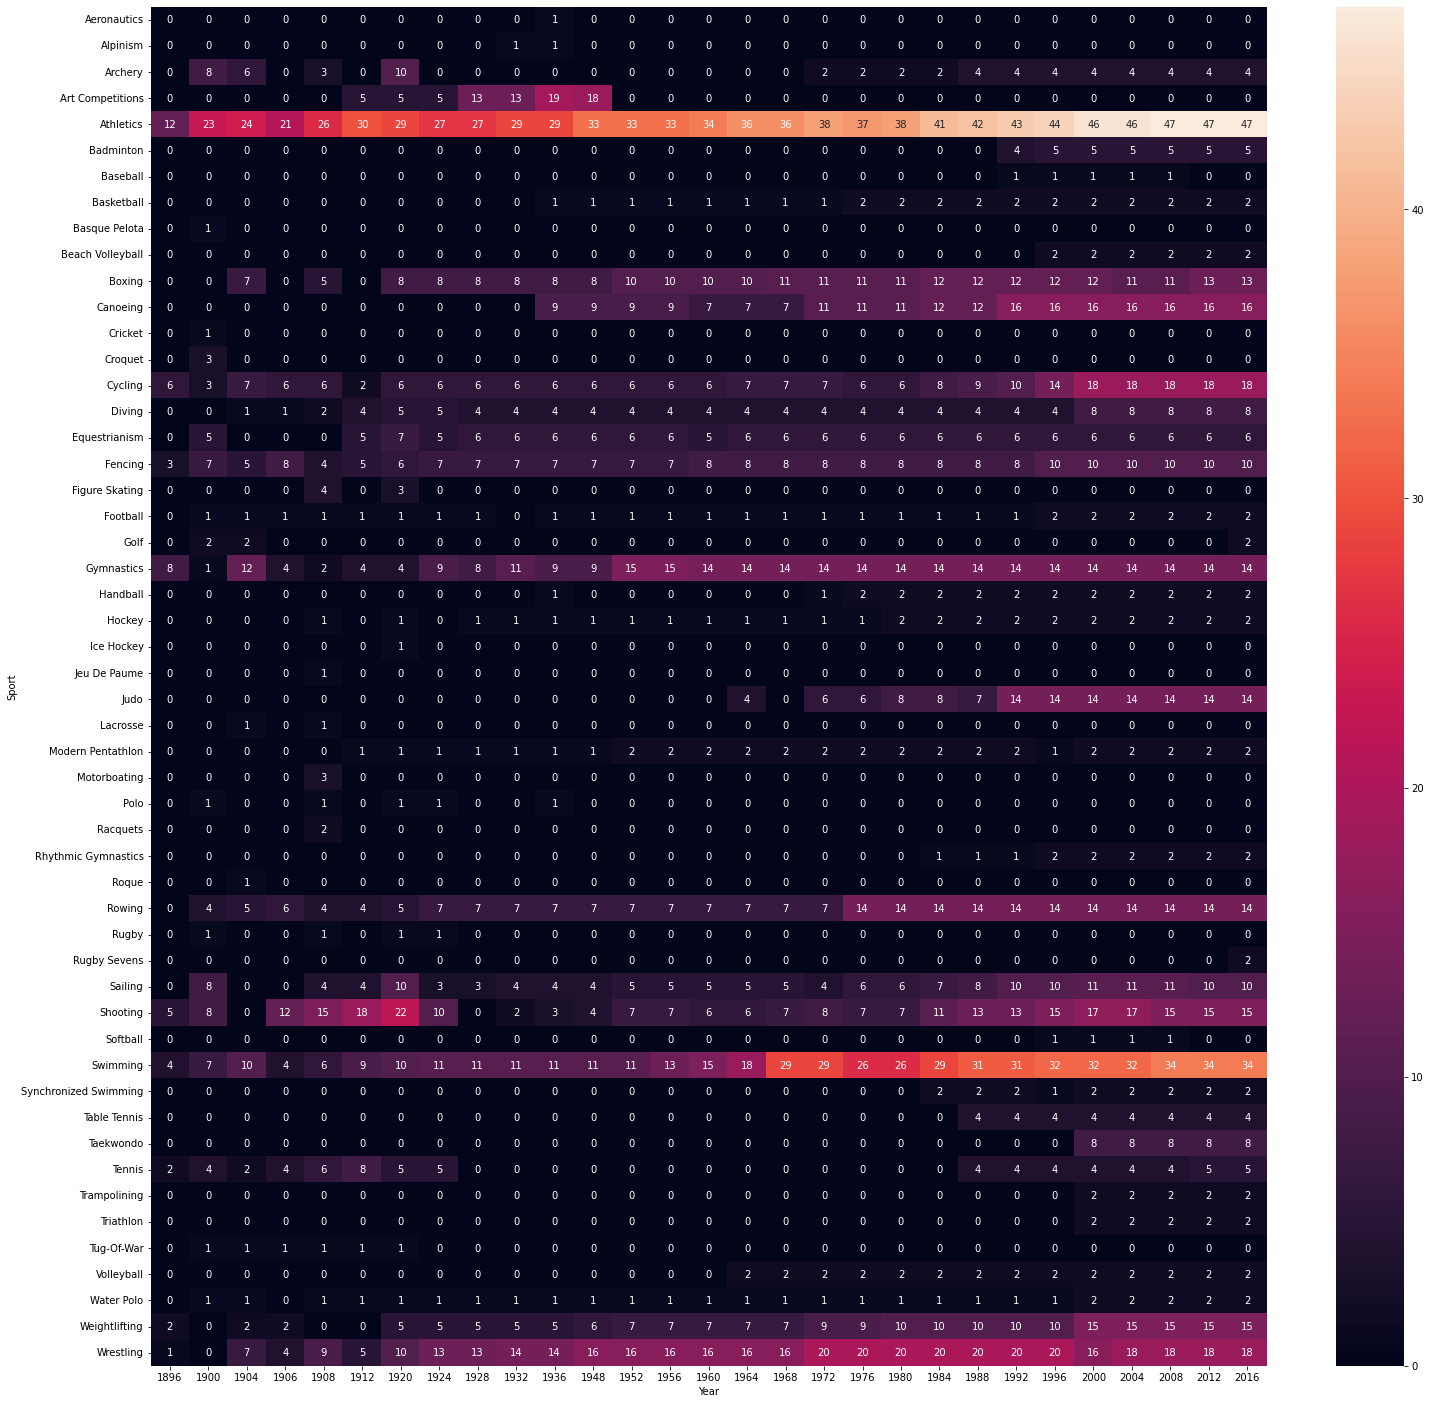

In [38]:
x = athletes_summer.drop_duplicates(['Year','Sport','Event'])
plt.figure(figsize=(25, 25))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event', aggfunc='count').fillna(0).astype('int'),annot=True)

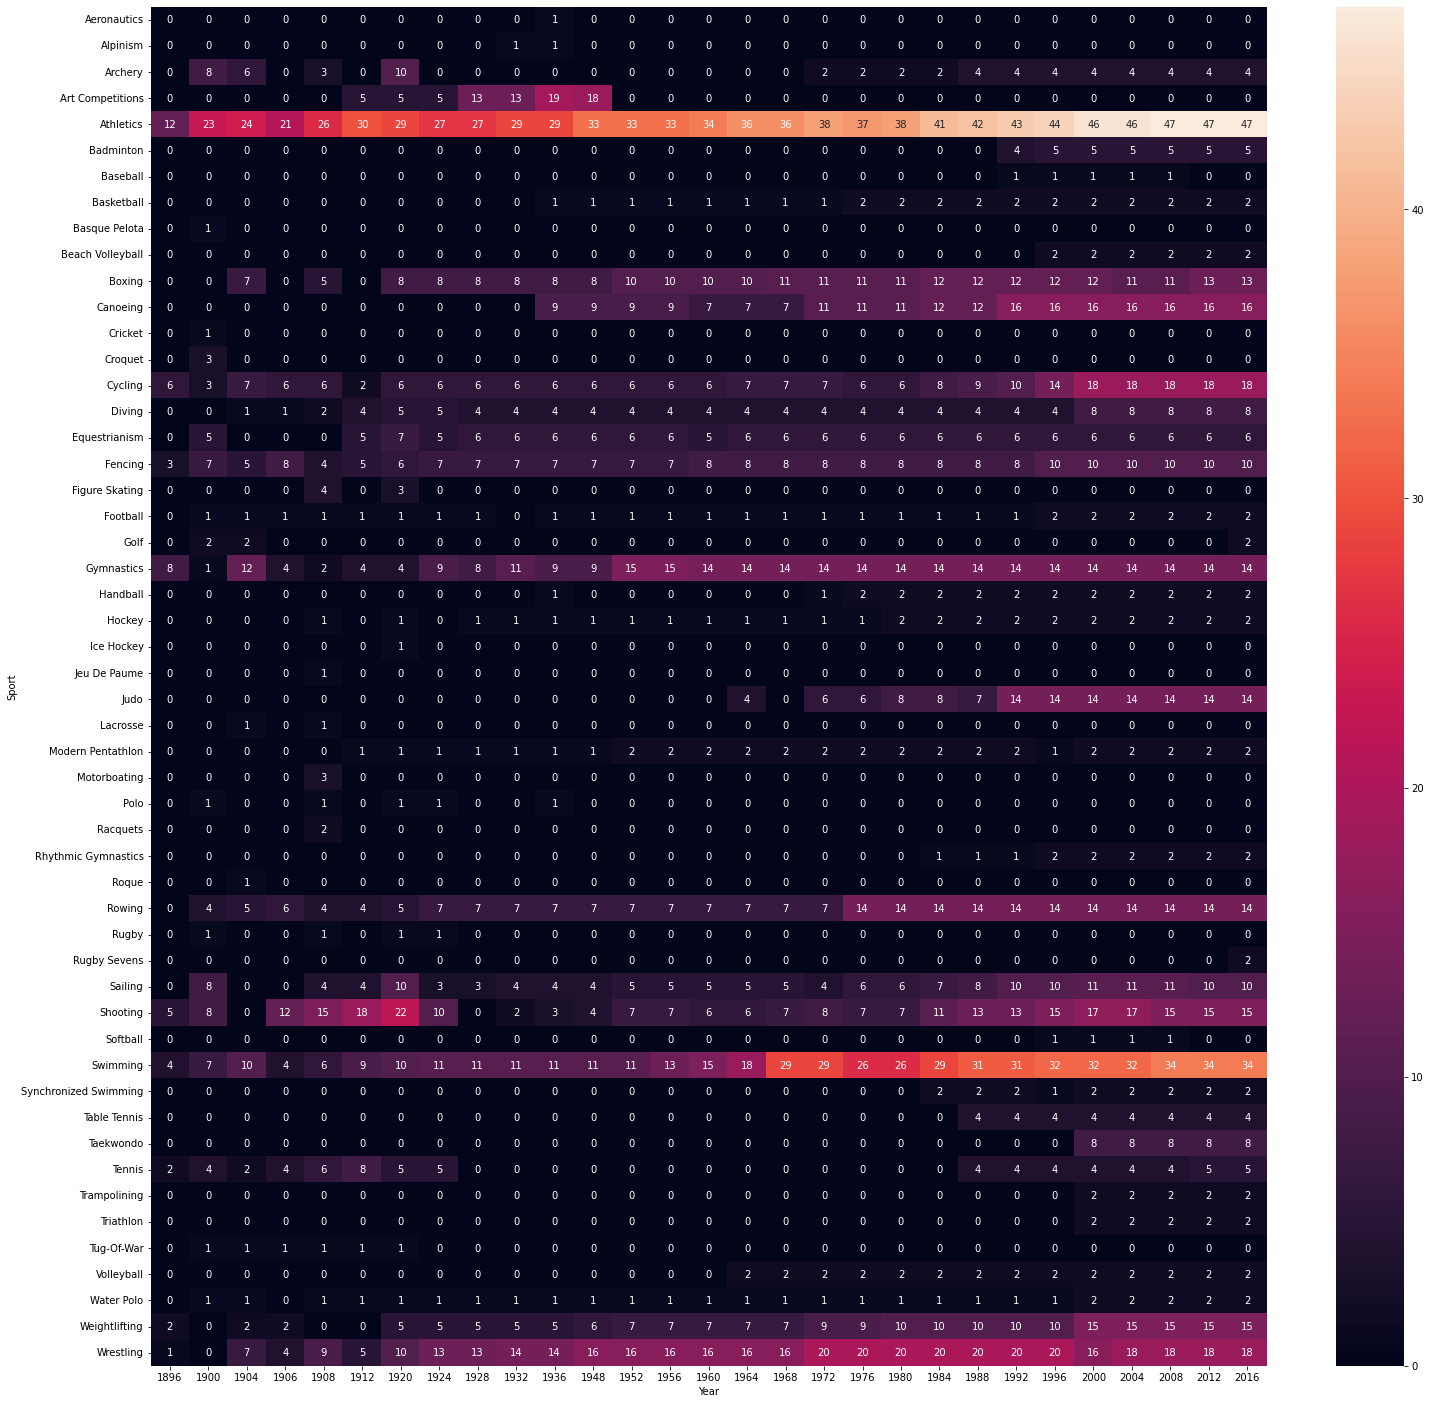

In [39]:
plt.figure(figsize=(25, 25))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event', aggfunc='count').fillna(0).astype('int'),annot=True)

In [40]:
def successful_athletes(df, sport):
  temp_df = df.dropna(subset=['Medal'])
  if sport != 'Overall':
    temp_df = temp_df[temp_df['Sport'] == sport]

  x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='index',right_on='Name',how='left')[['index','Name_x', 'Sport', 'region']].drop_duplicates('index')
  x.rename(columns={'index':'Name', 'Name_x':'Medals', 'region':'Country'},inplace=True)
  return x

In [41]:
successful_athletes(athletes_summer, 'Overall')

,Name,Medals,Sport,Country
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
130,Edoardo Mangiarotti,13,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
157,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
178,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
195,Birgit Fischer-Schmidt,12,Canoeing,Germany


# Country wise

1. country wise medal tally per year (line plot)
2. what countries are good at heatmap
3. Most succesful Athletes(top 10)

In [57]:
temp_df = athletes_summer.dropna(subset=['Medal'])
temp_df = temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])


In [45]:
temp_ = temp_df[temp_df['region'] == 'USA']
temp_ = temp_.groupby('Year').count()['Medal'].reset_index()

In [47]:
fig = px.line(temp_, x='Year', y='Medal')
fig.show()

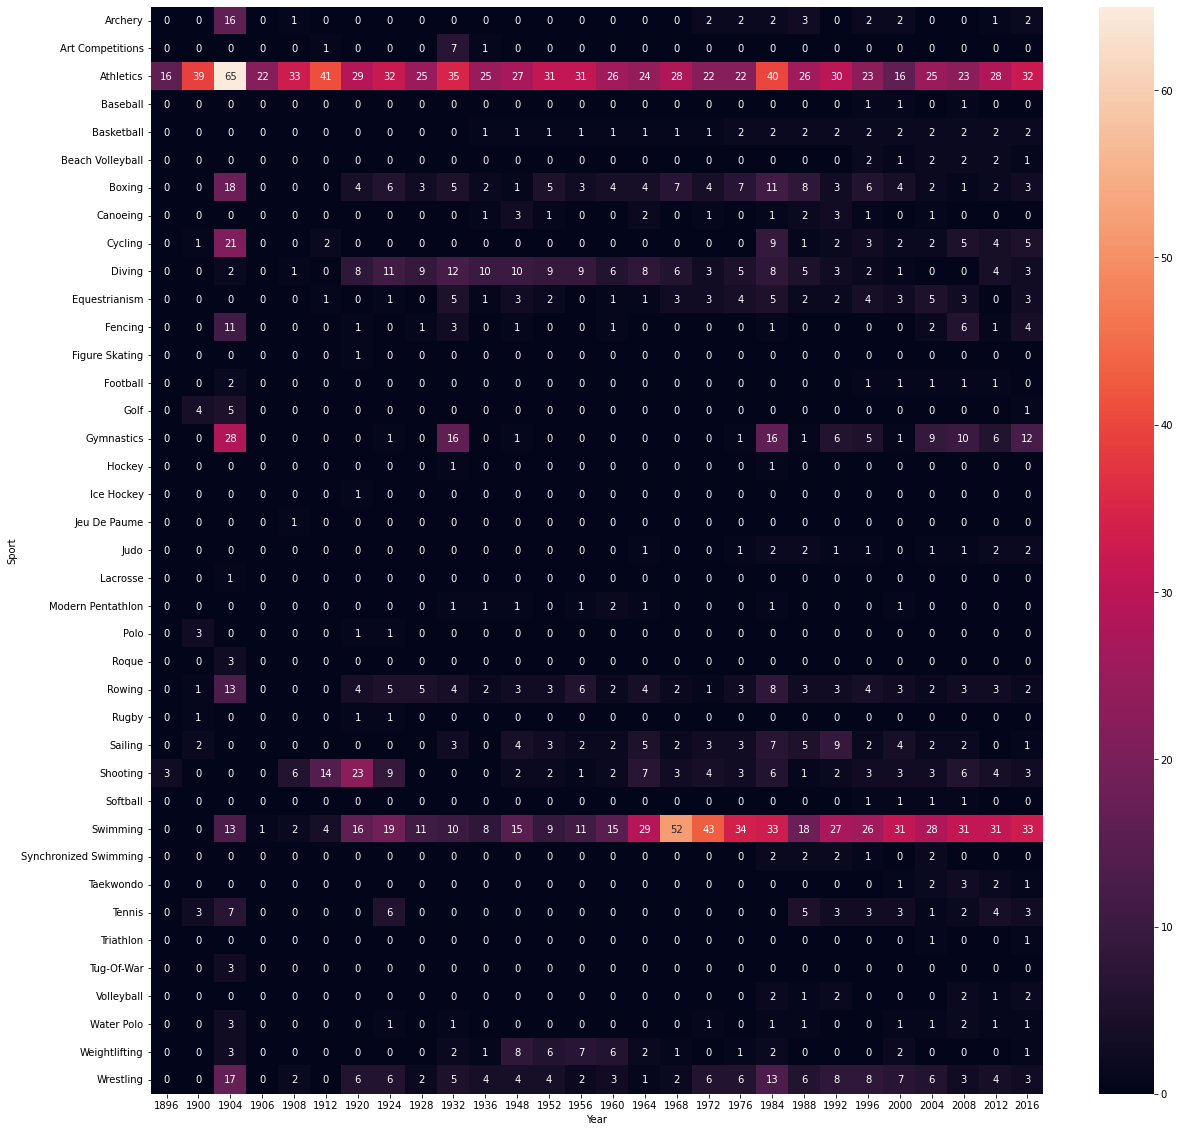

In [53]:
temp_ = temp_df[temp_df['region'] == 'USA']
plt.figure(figsize=(20,20))
sns.heatmap(temp_.pivot_table(index='Sport', columns='Year', values='Medal',aggfunc='count').fillna(0),annot=True)

In [73]:
def successful_athletes(df, country):
  temp_df = df.dropna(subset=['Medal'])
  temp_df = temp_df[temp_df['region'] == country]
  x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='index',right_on='Name',how='left')[['index','Name_x', 'Sport']].drop_duplicates('index')
  x.rename(columns={'index':'Name', 'Name_x':'Medals', 'region':'Sport'},inplace=True)
  return x.reset_index().drop(['index'], axis=1)

In [74]:
successful_athletes(athletes_summer, 'Australia')

,Name,Medals,Sport
0,Ian James Thorpe,9,Swimming
1,Leisel Marie Jones,9,Swimming
2,Petria Ann Thomas (-Jones),8,Swimming
3,Dawn Lorraine Fraser,8,Swimming
4,"Susan ""Susie"" O'Neill",8,Swimming
5,Grant George Hackett,7,Swimming
6,"Lisbeth Constance ""Libby"" Lenton-Trickett",7,Swimming
7,Shirley Barbara Strickland de la Hunty,7,Athletics
8,"Francis Joseph Edmund ""Frank"" De Beaurepaire",6,Swimming
9,Anna Maree Devenish Meares,6,Cycling


In [75]:
import plotly.figure_factory as ff
athlete_df = athletes_summer.drop_duplicates(subset=['Name','region'])
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

In [77]:
fig = ff.create_distplot([x1, x2, x3, x4],['Overall Age', 'Gold medalist', 'Silver medalist', 'Bronze medalist'],show_hist=False,show_rug=False)
fig.show()

In [90]:
def sport_age_dist(df, sport):
  df = df[df['Sport'] == sport]
  x1 = df['Age'].dropna()
  x2 = df[df['Medal'] == 'Gold']['Age'].dropna()
  x3 = df[df['Medal'] == 'Silver']['Age'].dropna()
  x4 = df[df['Medal'] == 'Bronze']['Age'].dropna()
  fig = ff.create_distplot([x1, x2, x3, x4],['Overall Age', 'Gold medalist', 'Silver medalist', 'Bronze medalist'],show_hist=False,show_rug=False)
  fig.show()


In [92]:
sport_age_dist(athlete_df, 'Swimming')

In [96]:
athlete_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222544,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia,NaN,1,0,0
222546,135565,Fernando scar Zylberberg,M,23.0,168.0,76.0,Argentina,ARG,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [108]:
athlete_df = athletes_summer.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
athlete_df['Medal'].fillna('No Medal',inplace=True)
athlete_df['Weight'].dropna()
athlete_df['Height'].dropna()
temp_df = athlete_df[athlete_df['Sport'] == 'Polo']
athlete_df.isnull().sum()
# plt.figure(figsize=(10,10))
# sns.scatterplot(temp_df['Weight'], temp_df['Height'],hue=temp_df['Medal'],style=temp_df['Sex'],s=100)

ID             0
Name           0
Sex            0
Age         3281
Height     19387
Weight     19825
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
region       259
notes     103535
Bronze         0
Gold           0
Silver         0
dtype: int64